<h1><center>LOG6953C - TP3</center></h1>

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.visualization import plot_histogram
import re

Question 1

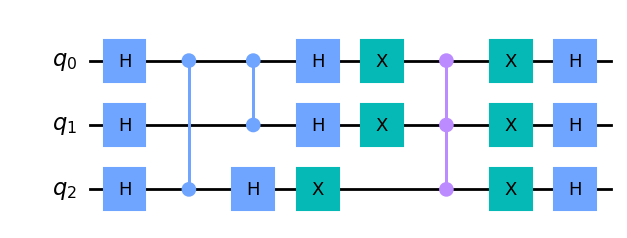

In [29]:
grover_circuit = QuantumCircuit(3)
# grover_circuit = initialize_s(grover_circuit, [0,1,2])
for q in [0, 1, 2]:
    grover_circuit.h(q)
grover_circuit.cz(2, 0)
grover_circuit.cz(1, 0)

for qubit in range(3):
    grover_circuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(3):
    grover_circuit.x(qubit)
# Do multi-controlled-Z gate
grover_circuit.ccz(2,1,0)
# Apply transformation |11..1> -> |00..0>
for qubit in range(3):
    grover_circuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(3):
    grover_circuit.h(qubit)

grover_circuit.draw(output='mpl')

Question 2

In [24]:
def cz_to_hcnoth(codeline:str,number:int):
    if re.search('prog.cz', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('cz[(](.*)[,]', "h(", new_codeline)+"# number="+str(number)+"\n"+\
               re.sub('cz', "cx", new_codeline)+"# number="+str(number+1)+"\n"+\
               re.sub('cz[(](.*)[,]',"h(", new_codeline)+"# number="+str(number+2)+"\n"
    else:
        raise Exception('No CZ gate for CNOT transformation')

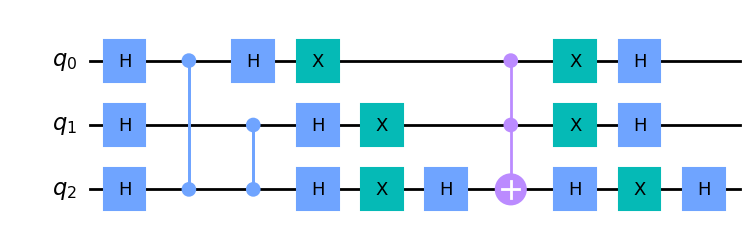

In [25]:
from gates_equivalent import cz_to_hcnoth

circuit = '''n = 3
prog = QuantumCircuit(n)
for q in [0,1,2]:
    prog.h(q)
prog.cz(0, 2)
prog.cz(1, 2)
for qubit in range(n):
    prog.h(qubit)
for qubit in range(n):
    prog.x(qubit)
prog.h(n-1)
prog.mct(list(range(n-1)), n-1)
prog.h(n-1)
for qubit in range(n):
    prog.x(qubit)
for qubit in range(n):
    prog.h(qubit)
    '''
exec(circuit)
prog.draw(output='mpl')

# print(cz_to_hcnoth(circuit, 0))

In [26]:
search_sequence = 'prog.cz'

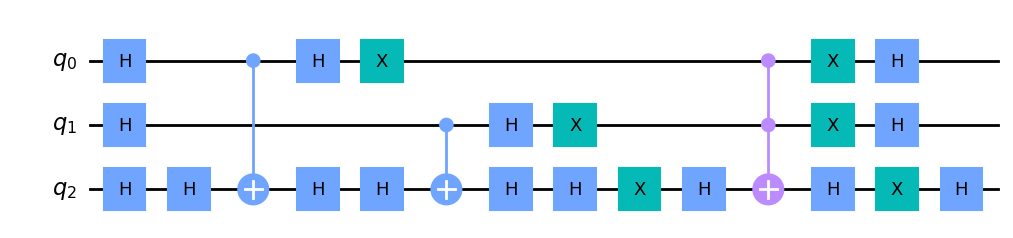

In [27]:
lines = circuit.splitlines()
mutant = ""
for i, line in enumerate(lines):
    if search_sequence in line:
        mutant+='\n'+cz_to_hcnoth(line,i)
    else :
        mutant+='\n'+line
exec(mutant)
prog.draw(output='mpl')